# Human capital accumulation

In [51]:
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import sympy as sm
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

h_vec = np.linspace(0.1,1.5,100) 

In [3]:
class HumanCapitalAccumulation:
    def __init__(self, rho, beta, gamma, w, b, delta, h_vec):
        self.rho = rho
        self.beta = beta
        self.gamma = gamma
        self.w = w
        self.b = b
        self.delta = delta
        self.h_vec = h_vec
        
    def consumption(self,l_t, h_t):
        if l_t==1:
            c_t = self.w*h_t*l_t
            
        if l_t==0:
            c_t = self.b
            
        return c_t
            
    def utility(self,l_t,h_t):
        u_t = self.consumption(l_t, h_t)**(1-self.rho)/(1-self.rho) - self.gamma*l_t
        
        return u_t
    
    def humancapital(self, l_t, h_t, prob):
        h_2 = h_t + l_t + prob*self.delta
        
        return h_2

    def period1(self,l_t,h_t):
        #expected humancapital
        #h2 = 0.5 * self.humancapital(h_t, l_t, 1) + 0.5 * self.humancapital(h_t,l_t,0)
        h2 = self.humancapital(h_t, l_t, 0.5)
        
        #utility
        v1 = self.utility(l_t, h_t) + self.beta * self.utility(l_t,h2)
        
        return v1
    
    def period2(self, l_t, h_t):
        v2 = self.utility(l_t, h_t)
        
        return v2
    
    def solution(self, period):
        humancap = []
        optimallabour = []
        optimalutil = []
        workutil = []
        unemputil = []
        
        for h in self.h_vec:
            list = [period(0, h), period(1, h)]
            
            if list[1]>list[0]:
                optimallabour.append(1)
            else:
                optimallabour.append(0)
            
            optimalutil.append(max(list))
            workutil.append(list[1])
            unemputil.append(list[0])
            humancap.append(h)
        
        data = pd.DataFrame()
        data["h"]=humancap
        data["best l"]=optimallabour
        data["best u"]=optimalutil
        data["work u"]=workutil
        data["unemp u"]=unemputil
        
        return data

In [4]:
question1 = HumanCapitalAccumulation(rho,beta,gamma, w, b, Delta, h_vec)

### Question 1

In [5]:
data1 = question1.solution(question1.period2)

h  best l    best u    work u  unemp u
33  0.566667       1 -0.982353 -0.982353     -1.0

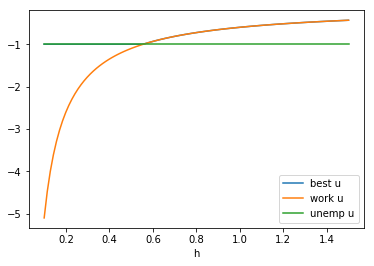

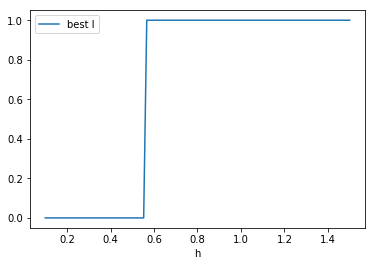

In [6]:
data1.plot(0,[2,3,4])
data1.plot(0,1)

data1[data1["unemp u"]<data1["work u"]].head(1)

### Question 2

In [7]:
data2 = question1.solution(question1.period1)

In [8]:
data2.head()

h  best l  best u    work u  unemp u
0  0.100000       0   -1.96 -5.613391    -1.96
1  0.114141       0   -1.96 -4.988852    -1.96
2  0.128283       0   -1.96 -4.501010    -1.96
3  0.142424       0   -1.96 -4.109180    -1.96
4  0.156566       0   -1.96 -3.787372    -1.96

h  best l    best u    work u  unemp u
18  0.354545       1 -1.948004 -1.948004    -1.96

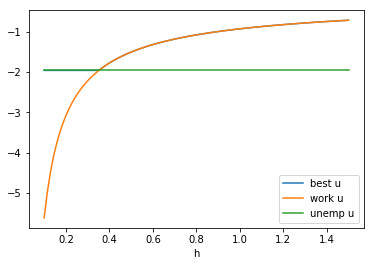

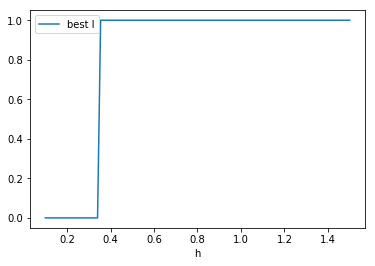

In [9]:
data2.plot(0,[2,3,4])
data2.plot(0,1)

data2[data2["unemp u"]<data2["work u"]].head(1)

### Question 3

In [10]:
data3 = question1.solution(question1.utility)

In [11]:
slice1 = data2.loc[data2["best l"]==1]
slice2 = data3.loc[data3["best l"]==1]

diff = slice1[~slice1["h"].isin(slice2["h"])]

In [12]:
print(diff)

           h  best l    best u    work u  unemp u
18  0.354545       1 -1.948004 -1.948004    -1.96
19  0.368687       1 -1.890505 -1.890505    -1.96
20  0.382828       1 -1.837070 -1.837070    -1.96
21  0.396970       1 -1.787270 -1.787270    -1.96
22  0.411111       1 -1.740733 -1.740733    -1.96
23  0.425253       1 -1.697140 -1.697140    -1.96
24  0.439394       1 -1.656210 -1.656210    -1.96
25  0.453535       1 -1.617697 -1.617697    -1.96
26  0.467677       1 -1.581387 -1.581387    -1.96
27  0.481818       1 -1.547089 -1.547089    -1.96
28  0.495960       1 -1.514633 -1.514633    -1.96
29  0.510101       1 -1.483870 -1.483870    -1.96
30  0.524242       1 -1.454666 -1.454666    -1.96
31  0.538384       1 -1.426899 -1.426899    -1.96
32  0.552525       1 -1.400463 -1.400463    -1.96


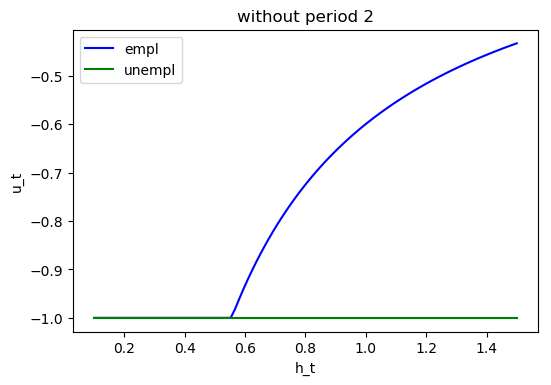

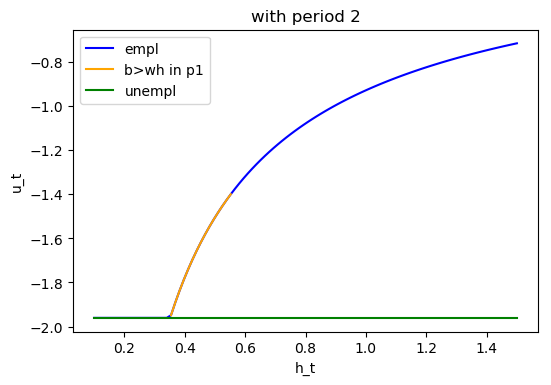

In [13]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(data3["h"],data3["best u"], label = "empl", color ="b")
ax.plot(data3["h"],data3["unemp u"], label = "unempl", color ="g")
ax.set_title("without period 2")
ax.set_xlabel("h_t")
ax.set_ylabel("u_t")
ax.legend()


fig1 = plt.figure(dpi=100)
ax2 = fig1.add_subplot(1,1,1)
ax2.plot(data2["h"],data2["best u"], label = "empl", color="b")
ax2.plot(diff["h"],diff["best u"], label = "b>wh in p1", color="orange")
ax2.plot(data2["h"],data2["unemp u"], label = "unempl", color="g")
ax2.set_title("with period 2")
ax2.set_xlabel("h_t")
ax2.set_ylabel("u_t")
ax2.legend()




# AS-AD Model

In [14]:
par = {}
par["alpha"] = 5.76
par["h"] = 0.5
par["b"] = 0.5
par["phi"] = 0
par["gamma"]=0.075

sm.init_printing(use_unicode=True)
pi_t = sm.symbols('pi_t')
pi_t1 = sm.symbols('pi_t-1')
alpha = sm.symbols("alpha")
h = sm.symbols("h")
b = sm.symbols("b")
phi = sm.symbols("phi")
gamma = sm.symbols("gamma")
v_t = sm.symbols('v_t')
y_t = sm.symbols('y_t')
y_t1 = sm.symbols('y_t-1')
s_t = sm.symbols('s_t')
s_t1 = sm.symbols('s_t-1')

In [15]:
adsras = sm.Eq(1/(h*alpha)*(v_t-(1+b*alpha)*y_t), pi_t1 + gamma*y_t - phi*gamma*y_t1 + s_t - phi*s_t1)
adsras

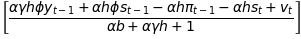

In [16]:
y_sol = sm.solve(adsras, y_t)
y_sol

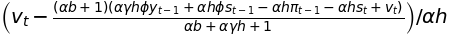

In [17]:
admod = 1/(h*alpha)*(v_t-(1+b*alpha)*y_sol[0])
admod

In [18]:
y_sol_num = sm.Eq(y_sol[0].subs(alpha, par["alpha"]).subs(h,par["h"]).subs(b,par["b"]).subs(phi,par["phi"]).subs(gamma,par["gamma"]),y_t)
y_sol_num

In [19]:
admod_num = admod.subs(alpha, par["alpha"]).subs(h,par["h"]).subs(b,par["b"]).subs(phi,par["phi"]).subs(gamma,par["gamma"])
admod_num

In [20]:
_y_sol = sm.lambdify((y_t1, pi_t1, s_t, s_t1 ,v_t, alpha, gamma, h, phi, b), y_sol[0])
_admod = sm.lambdify((y_t1, pi_t1, s_t, s_t1 ,v_t, alpha, gamma, h, phi, b), admod)

def y_sol(y_t1, pi_t1, s_t, s_t1 ,v_t):
    return _y_sol(y_t1, pi_t1, s_t, s_t1 ,v_t, alpha = par["alpha"], h = par["h"], b = par["b"], phi = par["phi"], gamma = par["gamma"])

def pi_sol(y_t1, pi_t1, s_t, s_t1 ,v_t):
    return _admod(y_t1, pi_t1, s_t, s_t1 ,v_t, alpha = par["alpha"], h = par["h"], b = par["b"], phi = par["phi"], gamma = par["gamma"])

In [21]:
y_graph = y_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t=0)

pi_graph = pi_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t = 0)

In [22]:
print(f"y in equilibrium:",y_graph)
print(f"pi in equilibrium:",pi_graph)

y in equilibrium: 0.0
pi in equilibrium: 0.0


In [134]:
class ASAD:
    def __init__(self, gamma, phi, h, b, alpha):
        self.gamma = gamma
        self.phi = phi
        self.h = h
        self.b = b
        self.alpha = alpha
        
    def sras(self, pi_t1, y_t, y_t1, s_t, s_t1):
        pi_t = pi_t1 + self.gamma * y_t + - self.phi * self.gamma * y_t1 + s_t - self.phi * s_t1
        return pi_t
    
    def ad(self, v_t, y_t):
        pi_t = 1/(self.h*self.alpha)*(v_t-(1+self.b*self.alpha)*y_t)
        return pi_t
    
    def funcy(self,y_t1, s_t1, pi_t1, s_t, v_t, phi):
        y = ((self.alpha * self.gamma * self.h * phi * y_t1 
            + self.alpha * self.h * phi * s_t1 - self.alpha
            * self.h * pi_t1 - self.alpha * self.h * s_t + v_t)
            /(self.alpha * self.b + self.alpha * self.gamma 
            * self.h + 1))
        return y
        
    def funcpi(self, y_t1, s_t1, pi_t1, s_t, v_t, phi):
        
        pi = ((v_t - (self.alpha * self.b + 1) * self.funcy(y_t1, s_t1, pi_t1, s_t, v_t, phi=phi))
            /(self.alpha*self.h))
        
        return pi
        
    def ar_v(self, delta, v_t1, x_t):
        v_t = delta*v_t1 + x_t
        return v_t
    
    def ar_s(self, omega, s_t1, c_t):
        s_t = omega*s_t1 + c_t
        return s_t
    
    def ar_simulation(self, N, omega, delta, phi):
        N = N
        pi_vec = np.zeros(N)
        y_vec = np.zeros(N)
        s_vec = np.zeros(N)
        v_vec = np.zeros(N)
        c_vec = np.zeros(N)
        x_vec = np.zeros(N)
        i_vec = np.zeros(N)
        
        x_vec[1] = 0.1
        
        for i in range(1, N):
            i_vec[i] = i
            v_vec[i] = self.ar_v(delta, v_vec[i-1], x_vec[i])
            s_vec[i] = self.ar_s(omega, s_vec[i-1], c_vec[i])
            y_vec[i] = self.funcy(y_t1 = y_vec[i-1], s_t1 = s_vec[i-1], pi_t1 = pi_vec[i-1], s_t = s_vec[i], v_t = v_vec[i], phi=phi)
            pi_vec[i] = self.funcpi(y_t1 = y_vec[i-1], s_t1 = s_vec[i-1], pi_t1 = pi_vec[i-1], s_t = s_vec[i], v_t = v_vec[i], phi=phi)
        
        data = pd.DataFrame()
        data["iteration"] = i_vec
        data["pi"] = pi_vec
        data["y"] = y_vec
        data["s"] = s_vec
        data["v"] = v_vec
        data["c"] = c_vec
        data["x"] = x_vec
        
        return data
    
    def stoch_simulation(self, N, omega, delta, sigmax, sigmac, seed, phi):
        np.random.seed(seed)
        N = N
        
        pi_vec = np.zeros(N)
        y_vec = np.zeros(N)
        s_vec = np.zeros(N)
        v_vec = np.zeros(N)
        i_vec = np.zeros(N)
        
        c_vec = np.random.normal(0, sigmac, N)
        x_vec = np.random.normal(0, sigmax, N)
        c_vec[0] = 0
        x_vec[0] = 0
        c_vec[1] = 0
        x_vec[1] = 0.1
        
        for i in range(1, N):
            i_vec[i] = i
            v_vec[i] = self.ar_v(delta, v_vec[i-1], x_vec[i])
            s_vec[i] = self.ar_s(omega, s_vec[i-1], c_vec[i])
            yres =  self.funcy(y_t1 = y_vec[i-1], s_t1 = s_vec[i-1], pi_t1 = pi_vec[i-1], s_t = s_vec[i], v_t = v_vec[i], phi = phi)
            y_vec[i] = yres
            pires = self.funcpi(y_t1 = y_vec[i-1], s_t1 = s_vec[i-1], pi_t1 = pi_vec[i-1], s_t = s_vec[i], v_t = v_vec[i], phi = phi)
            pi_vec[i] = pires
        data = pd.DataFrame()
        data["iteration"] = i_vec
        data["pi"] = pi_vec
        data["y"] = y_vec
        data["s"] = s_vec
        data["v"] = v_vec
        data["c"] = c_vec
        data["x"] = x_vec
        
        return data
        
        

Text(0, 0.5, 'inflationgap')

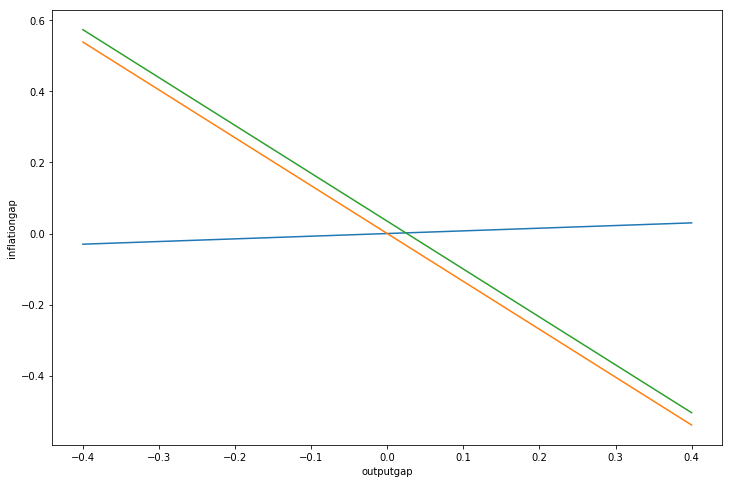

In [121]:
gamma = par["gamma"]
phi = par["phi"]
h = par["h"]
b = par["b"]
alpha = par["alpha"]
pi_t1 = 0
y_t1 = 0
s_t = 0
s_t1 = 0
v_t = 0

y_vec = np.linspace(-0.4, 0.4, 100)

asad1 = ASAD(gamma, phi, h, b, alpha)
sras1 = asad1.sras(pi_t1, y_vec, y_t1, s_t, s_t1)
ad1 = asad1.ad(v_t, y_vec)
ad2 = asad1.ad(0.1, y_vec)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(y_vec,sras1)
ax.plot(y_vec,ad1)
ax.plot(y_vec,ad2)
ax.set_xlabel("outputgap")
ax.set_ylabel("inflationgap")

In [122]:
delta = 0.80
omega = 0.15
ardata = asad1.ar_simulation(100, omega, delta, phi = asad1.phi)
ardata.head()



iteration        pi         y    s       v    c    x
0        0.0  0.000000  0.000000  0.0  0.0000  0.0  0.0
1        1.0  0.001831  0.024414  0.0  0.1000  0.0  0.1
2        2.0  0.003199  0.018244  0.0  0.0800  0.0  0.0
3        3.0  0.004202  0.013375  0.0  0.0640  0.0  0.0
4        4.0  0.004918  0.009545  0.0  0.0512  0.0  0.0

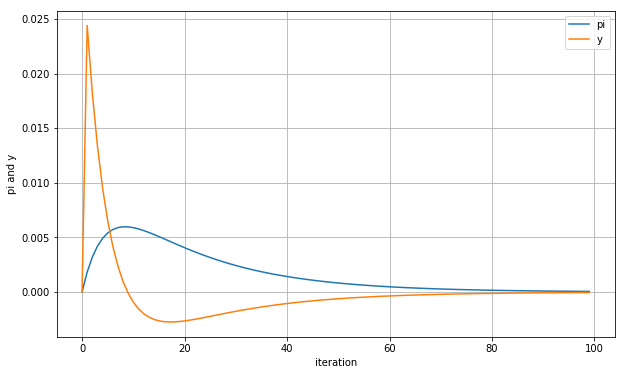

In [123]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(ardata["iteration"], ardata["pi"])
ax.plot(ardata["iteration"], ardata["y"])
ax.set_xlabel("iteration")
ax.set_ylabel("pi and y")
ax.legend()
ax.grid(True)

In [124]:
stochdata = asad1.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404, phi=asad1.phi)
stochdata.head(20)

iteration        pi         y         s          v         c         x
0         0.0  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000
1         1.0  0.001831  0.024414  0.000000   0.100000  0.000000  0.100000
2         2.0  0.012862  0.985219 -0.062861   3.859693 -0.062861  3.779693
3         3.0  0.031249 -1.113500  0.101899  -4.230382  0.111329 -7.318137
4         4.0 -0.228226 -3.105331 -0.026575 -12.705975 -0.041860 -9.321669
5         5.0 -0.494979 -3.472084 -0.006346 -14.897225 -0.002360 -4.732445
6         6.0 -0.464118 -2.868983  0.246035 -12.468315  0.246987 -0.550534
7         7.0 -0.649760 -2.851512  0.028221 -12.935175 -0.008684 -2.960523
8         8.0 -0.974973 -2.574521 -0.132124 -12.797064 -0.136357 -2.448924
9         9.0 -0.890738 -1.814466  0.220320  -9.605454  0.240138  0.632197
10       10.0 -0.737427 -1.980342  0.301837  -9.807517  0.268789 -2.123154
11       11.0 -0.944240 -1.136883 -0.121546  -7.130516 -0.166822  0.715497
12       12.0 -0.887666 -1.765252  0.188968  -9.405656  0.207200 -3.701243
13       13.0 -0.722313 -2.615364  0.361505 -12.227876  0.333160 -4.703351
14       14.0 -0.569150 -1.212778  0.244121  -6.344731  0.189896  3.437569
15       15.0 -0.377112 -0.773096  0.250020  -4.085694  0.213402  0.990091
16       16.0 -0.347564 -1.158015  0.116399  -5.494082  0.078896 -2.225527
17       17.0 -0.193708  0.217668  0.137531   0.286674  0.120071  4.681939
18       18.0 -0.478793 -0.467384 -0.250031  -3.192375 -0.270661 -3.421714
19       19.0 -0.712099 -0.038694 -0.230404  -2.200978 -0.192899  0.352922

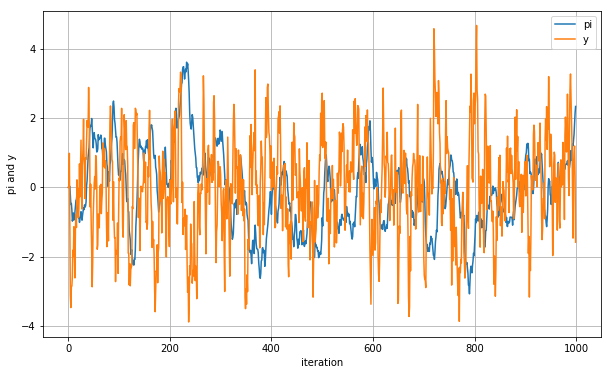

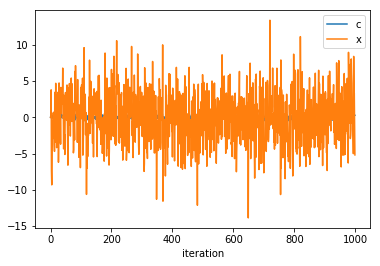

In [125]:
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(stochdata["iteration"], stochdata["pi"])
ax1.plot(stochdata["iteration"], stochdata["y"])
ax1.set_xlabel("iteration")
ax1.set_ylabel("pi and y")
ax1.legend()
ax1.grid(True)

stochdata.plot(0,[5,6])

In [126]:
yarray = np.array(stochdata["y"])
piarray = np.array(stochdata["pi"])

print(f"y variance is {np.var(yarray):.4f}")
print(f"pi variance is {np.var(piarray):.4f}")
print(f"y-pi corr is {(np.corrcoef(yarray, piarray)[1,0]):.4f}")
print(f"y autocorr is {(np.corrcoef(yarray[1:], yarray[:-1])[1,0]):.4f}")
print(f"pi autocorr is {(np.corrcoef(piarray[1:], piarray[:-1])[1,0]):.4f}")

y variance is 2.0500
pi variance is 1.2927
y-pi corr is -0.1353
y autocorr is 0.7682
pi autocorr is 0.9813


Text(0, 0.5, 'y-pi corr')

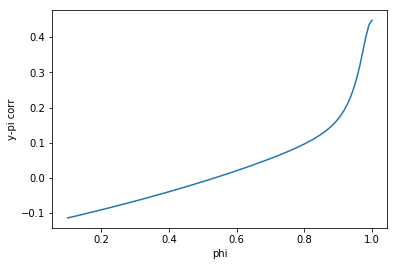

In [127]:
def corr_phi_func():
    phi_vec = np.linspace(0.1,1,100)
    corrarray = np.empty(100)
    phiarray = np.empty(100)

    for i, phi in enumerate(phi_vec):
        asad2 = ASAD(gamma, phi, h, b, alpha)
        stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404)
        corrarray[i] = np.corrcoef(stoch2data["y"], stoch2data["pi"])[1,0]
        phiarray[i] = phi
        
    return corrarray, phiarray

plt.plot(phiarray, corrarray)
plt.xlabel("phi")
plt.ylabel("y-pi corr")

In [128]:
def corr_func(phi):
    asad2 = ASAD(gamma, phi, h, b, alpha)
    stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404, phi = asad2.phi)
    return (np.corrcoef(stoch2data["y"], stoch2data["pi"])[1,0]-0.31)**2

phi_root = optimize.minimize(corr_func,x0=0)
phi_root

      fun: 8.552675723015356e-16
 hess_inv: array([[0.03023896]])
      jac: array([8.65147877e-09])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 6
     njev: 16
   status: 0
  success: True
        x: array([0.96166711])

In [185]:
def corr_func2(vec):
    phi, sigmax, sigmac = vec
    asad2 = ASAD(gamma, phi, h, b, alpha)
    stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = sigmax, sigmac = sigmac, seed = 404, phi=phi)
    yarray = np.array(stoch2data["y"])
    piarray = np.array(stoch2data["pi"])
    
    sq_y_var = (np.var(yarray)-1.64)**2
    sq_pi_var = (np.var(piarray)-0.21)**2
    sq_ypi_corr = (np.corrcoef(yarray, piarray)[1,0]-0.31)**2
    sq_y_auto = (np.corrcoef(yarray[1:], yarray[:-1])[1,0]-0.84)**2
    sq_pi_auto = (np.corrcoef(piarray[1:], piarray[:-1])[1,0]-0.48)**2
    
    sqlist = [sq_y_var, sq_pi_var, sq_ypi_corr, sq_y_auto, sq_pi_auto]
    
    return sqlist

def corr_min(vec):
    list = corr_func2(vec)
    sqsum = sum(list)
    
    return sqsum

phi_root = optimize.minimize(corr_min, method="SLSQP", x0 = [0,3.492,0.2], bounds = ((0,1), (10**-6,10**6), (10**-6,10**6)))
phi_root

     fun: 0.02357833074782297
     jac: array([-0.00492959,  0.00137263, -0.00171619])
 message: 'Optimization terminated successfully.'
    nfev: 85
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.97176943, 3.02307287, 0.21949113])

In [186]:
phi_sol, sigmax_sol, sigmac_sol = phi_root.x
stochdata = asad1.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = sigmax_sol, sigmac = sigmac_sol, seed = 404, phi=phi_sol)

yarray = np.array(stochdata["y"])
piarray = np.array(stochdata["pi"])

print(f"y variance is {np.var(yarray):.4f}")
print(f"pi variance is {np.var(piarray):.4f}")
print(f"y-pi corr is {(np.corrcoef(yarray, piarray)[1,0]):.4f}")
print(f"y autocorr is {(np.corrcoef(yarray[1:], yarray[:-1])[1,0]):.4f}")
print(f"pi autocorr is {(np.corrcoef(piarray[1:], piarray[:-1])[1,0]):.4f}")

y variance is 1.6461
pi variance is 0.0718
y-pi corr is 0.2732
y autocorr is 0.7845
pi autocorr is 0.4844


# Exchange economy

In [14]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

elist = [e1,e2,e3]

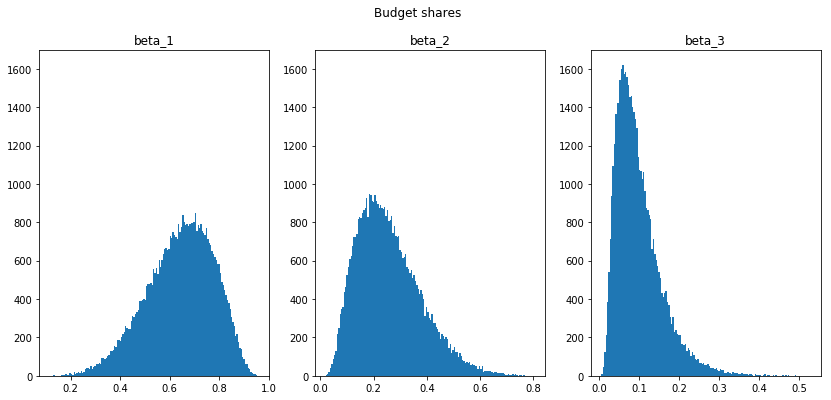

In [15]:
fig, axs = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Budget shares')

ylims = (0,1700)

axs[0].hist(betas[:,0], bins=150)
axs[0].set_title("beta_1")
axs[0].set_ylim(ylims)

axs[1].hist(betas[:,1], bins=150)
axs[1].set_title("beta_2")
axs[1].set_ylim(ylims)

axs[2].hist(betas[:,2], bins=150)
axs[2].set_title("beta_3")
axs[2].set_ylim(ylims)

plt.show()

In [16]:
for i in range(3):
    print(f"mean for beta_{str(i+1)} is {np.mean(betas[:,i]):.4f}")
    print(f"variance for beta_{str(i+1)} is {np.var(betas[:,i]):.4f}")

mean for beta_1 is 0.6423
variance for beta_1 is 0.0182
mean for beta_2 is 0.2581
variance for beta_2 is 0.0142
mean for beta_3 is 0.0996
variance for beta_3 is 0.0033


In [79]:
class ExchangeEconomy:
    def __init__(self,betas, elist, N, p1, p2, gamma=None):
        self.betas = betas
        self.elist = elist
        self.N = N
        self.p1 = p1
        self.p2 = p2
        self.gamma=gamma
        
    def budget(self):
        I = np.empty(self.N)
        I = self.p1 * self.elist[0] + self.p2 * self.elist[1] + self.elist[2]
            
        return I
    
    def demand_func(self):
        x = np.empty((3, self.N))
        I = self.budget()
        
        x[0] = self.betas[:,0] * I / self.p1
        x[1] = self.betas[:,1] * I / self.p2
        x[2] = self.betas[:,2] * I
        
        return x
    
    def excess_demand(self):
        z = np.empty(3)
        x = self.demand_func()
        
        for i in range(3):
            z[i] = np.sum(x[i])-np.sum(elist[i])
            
        return z        
    
    def walras(self, kappa, epsilon):
        kappa
        epsilon
        for i in range(self.N):
            z = self.excess_demand()
            if abs(z[0])<epsilon and abs(z[1])<epsilon:
                break
            else:
                self.p1 = self.p1+kappa*z[0]/self.N
                self.p2 = self.p2+kappa*z[1]/self.N
        return self.p1, self.p2
            
            
    def utility(self):
        x = self.demand_func()
        util = np.empty(self.N)
        
        for i in range(self.N):
            util[i] = (x[0,i]**betas[i,0]*x[1,i]**betas[i,1]*x[2,i]**betas[i,2])**self.gamma
        
        return util

In [63]:
price_vec = np.linspace(0.5,10,50)
price1, price2 = np.meshgrid(price_vec, price_vec) 
def plot3d():
    array1 = np.empty((len(price_vec), len(price_vec)))
    array2 = np.empty((len(price_vec), len(price_vec)))
    array3 = np.empty((len(price_vec), len(price_vec)))

    for i, p1 in enumerate(price_vec):
        for j,p2 in enumerate(price_vec):
            a = ExchangeEconomy(betas, elist, N, p1, p2)
            z = a.excess_demand()
            array1[i,j] = z[0]
            array2[i,j] = z[1]
            array3[i,j] = z[2]
    return array1, array2, array3
%time array1,array2,array3 = plot3d()

Wall time: 5.89 s


Text(0.5, 0, 'p2')

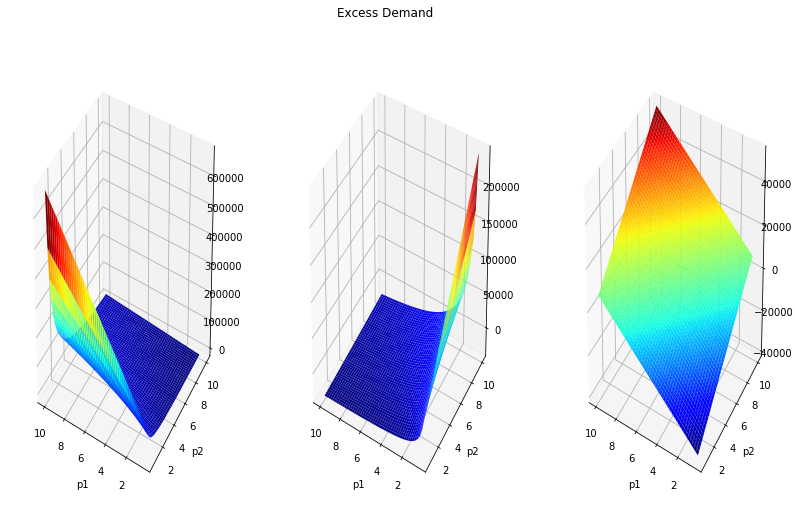

In [52]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Excess Demand')

ax1 = fig.add_subplot(131,projection='3d')
cs1 = ax1.plot_surface(price1,price2,array1, cmap=cm.jet)
ax1.invert_xaxis()
ax1.set_xlabel("p1")
ax1.set_ylabel("p2")

ax2 = fig.add_subplot(132,projection='3d')
cs2 = ax2.plot_surface(price1,price2,array2, cmap=cm.jet)
ax2.invert_xaxis()
ax2.set_xlabel("p1")
ax2.set_ylabel("p2")

ax3 = fig.add_subplot(133,projection='3d')
cs3 = ax3.plot_surface(price1,price2,array3, cmap=cm.jet)
ax3.invert_xaxis()
ax3.set_xlabel("p1")
ax3.set_ylabel("p2")

In [77]:
b = ExchangeEconomy(betas, elist, N, 2, 2)
%time z = b.walras(kappa=0.15, epsilon=10**-5)
print(z)

Wall time: 16.4 s
(6.490055134537612, 2.6166939963966915)


In [80]:
p1, p2 = z
c = ExchangeEconomy(betas, elist, N, p1, p2, gamma)
c.excess_demand()

array([ 9.99628537e-06,  3.72918294e-06, -7.46345759e-05])

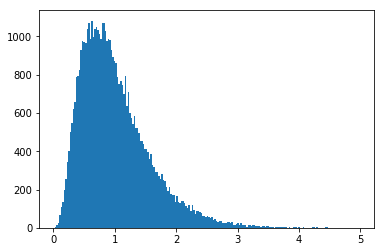

Mean is 1.010
Variance is 0.317


In [88]:
utilarray = c.utility()

plt.hist(utilarray,200)
plt.show()

print(f"Mean is {np.mean(utilarray):.3f}")
print(f"Variance is {np.var(utilarray):.3f}")

In [95]:
e1new = np.zeros(N)+np.mean(e1) 
e2new = np.zeros(N)+np.mean(e2)
e3new = np.zeros(N)+np.mean(e3)

newelist = [e1new, e2new, e3new]

e = ExchangeEconomy(betas, newelist, N, 2, 2, gamma)
newp1, newp2 = e.walras(0.15, 10**-5)

Mean is 1.046
Variance is 0.003


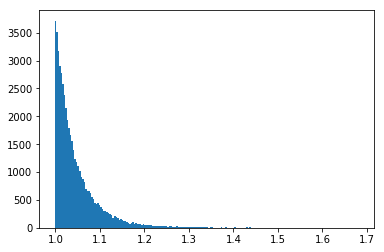

In [98]:
f = ExchangeEconomy(betas, newelist, N, newp1, newp2, gamma)
util = f.utility()

plt.hist(util, 200)
plt.show

print(f"Mean is {np.mean(util):.3f}")
print(f"Variance is {np.var(util):.3f}")

In [103]:
def gammafind():
    gammalist = []
    meanlist = []
    varlist = []
    for i in range(100):
        g = ExchangeEconomy(betas, newelist, N, newp1, newp2, (i+1)/100)
        util = g.utility()

        gammalist.append((i+1)/100)
        meanlist.append(np.mean(util))
        varlist.append(np.var(util))
        
    data = pd.DataFrame()
    data["gamma"]=gammalist
    data["mean"]=meanlist
    data["var"]=varlist
    
    return data

%time data = gammafind()

Wall time: 15.4 s


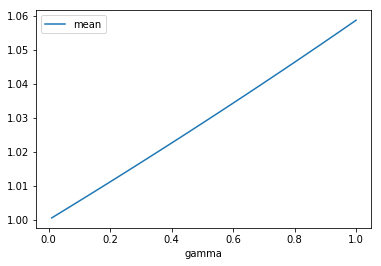

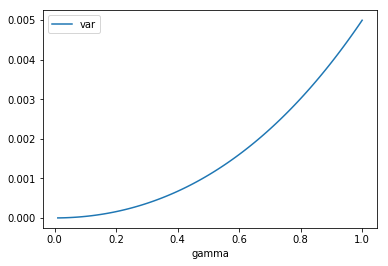

In [104]:
data.plot(0,1)
data.plot(0,2)